In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

!pwd

# Any results you write to the current directory are saved as output.

In [ ]:
# https://www.pythoncentral.io/insertion-sort-implementation-guide/
# Object Oriented Programming
class Queue:

  #Constructor creates a list
  def __init__(self):
      self.__queue = list()    # this hides the queue to outside calls. Use queue for normal use

  #Adding elements to queue
  def enqueue(self,data):
      #Checking to avoid duplicate entry (not mandatory)
      if data not in self.__queue:
          self.__queue.insert(0,data)
          return True
      return False

  #Removing the last element from the queue
  def dequeue(self):
      if len(self.__queue)>0:
          return self.__queue.pop()
      return ("Queue Empty!")

  #Getting the size of the queue
  def size(self):
      return len(self.__queue)

  #printing the elements of the queue
  def printQueue(self):
      return self.__queue

myQueue = Queue()
print(myQueue.enqueue(5)) #prints True

myQueue.__queue  # error


In [ ]:

# Queue implementation using deque

#Importing the library
from collections import deque

#Creating a Queue
queue = deque([1,5,8,9])

#Enqueuing elements to the Queue
queue.append(7) #[1,5,8,9,7]
queue.append(0) #[1,5,8,9,7,0]

#Dequeuing elements from the Queue
queue.popleft() #[5,8,9,7,0]
queue.popleft() #[8,7,9,0]

#Printing the elements of the Queue
print(queue)


In [ ]:
# STACK IMPLEMENTATION

class Stack:

    #Constructor creates a list
    def __init__(self):
        self.stack = list()

    #Adding elements to stack
    def push(self,data):
        #Checking to avoid duplicate entries
        if data not in self.stack:
            self.stack.append(data)
            return True
        return False

    #Removing last element from the stack
    def pop(self):
        if len(self.stack)<=0:
            return ("Stack Empty!")
        return self.stack.pop()
        
    #Getting the size of the stack
    def size(self):
        return len(self.stack)

myStack = Stack()
print(myStack.push(5)) #prints True


**Function Decorators**

In [ ]:
# 87) Function decorators

# not a bad solution first


from time import time
def timer(func, x, y=10):
    before = time()
    rv = func(x,y)
    after = time()
    # print('took time: %f')%(after - before)
    print('took time: ', after - before)
    return rv


def add(x,y=10):
    return x+y

# add = timer(add, x,y)


def subtract(x,y=10):
    return x-y

# subtract = timer(subtract, x,y)


print(timer(add, 20,5))
print(timer(add, 20))
print(subtract(20,5))
print(subtract(20))


In [ ]:
# A better solution here 

from time import time
def timer(func):
    def f(x, y=10):
        before = time()
        rv = func(x,y)
        after = time()
        # print('took time: %f')%(after - before)
        print('took time: ', after - before)
        return rv
    return f


@timer
def add(x,y=10):
    return x+y

#add = timer(add)


@timer
def subtract(x,y=10):
    return x-y

#subtract = timer(subtract)


print(add(20,5))
print(add(20))
print(subtract(20,5))
print(subtract(20))


In [ ]:
# And a much better solution taking any number of arbitrary parameters

from time import time
def timer(func):
    def f(*args, **kwargs):
        before = time()
        rv = func(*args, **kwargs)
        after = time()
        # print('took time: %f')%(after - before)
        print('took time: ', after - before)
        return rv
    return f


@timer
def add(x,y=10):
    return x+y

# add = timer(add)

@timer
def subtract(x,y=10):
    return x-y

# subtract = timer(subtract)


print(add(20,5))
print(add(20))
print(subtract(20,5))
print(subtract(20))

**Generator Example**

In [ ]:
# 88) generator example

from time import sleep

def compute():
    rv = []
    for i in range(10):
        sleep(.1)
        rv.append(i)
    return rv

# print(compute())

class Compute:
    def __iter__(self):
        self.last = 0
        return self

    def next(self):
        rv = self.last
        self.last += 1
        if self.last > 10:
            raise StopIteration()

        sleep(.1)
        return rv

ss = Compute()
print(ss.next)
# for val in ss:
#      print(val)


In [ ]:
# 89) A better solution for the above using just functions

def compute():
    for i in range(10):
        sleep(.5)
        yield i

for val in compute():
    print(val)


In [ ]:
90)  context manager    TODO!!

with open(‘foo.txt’, ‘w’) as f:
	f.write(‘xx’)

# watch https://www.youtube.com/watch?v=cKPlPJyQrt4    min 1:40


In [ ]:
# 91)  Reversing a string
def senRev(st):
    return ' '.join(st.split(' ')[::-1])

st = 'a sample sen'
print(st + ' --> ' + senRev(st))


In [ ]:
# 92) Python Functions - All about def, *args and **kwargs

from functools import reduce
def multiply(*nums):
    return reduce(lambda x, y : x * y, nums)

print(multiply(1,3,4,7,11))




def save_user(**user):
    print(user['id'])

save_user(id = 1, name = 'ali', dob = '79')
save_user(id = 1, name = 'ali2')


In [ ]:
# 93)
import datetime
datetime.date.today()
datetime.date(2018, 12, 3)
currDate = datetime.date.today()
currDate.year
currDate.month
currDate.day

currDate.strftime('%d %b %y')


In [ ]:
# 94) 
import datetime
birthday = input("what is your BD? ")
birthday  = datetime.datetime.strptime(birthday, "%m/%d/%Y").date()
print(birthday)


In [ ]:
# 95) import csv

data = csv.reader(myCSVFile)
data = csv.reader(myCSVFile, delimiter = “,”)



In [ ]:
98) Reading CSV files
https://realpython.com/python-csv/

import csv

with open('employee_birthday.txt', mode='r') as csv_file:
    csv_reader = csv.DictReader(csv_file)
    line_count = 0
    for row in csv_reader:
        if line_count == 0:
            print(f'Column names are {", ".join(row)}')
            line_count += 1
        print(f'\t{row["name"]} works in the {row["department"]} department, and was born in {row["birthday month"]}.')
        line_count += 1
    print(f'Processed {line_count} lines.')



In [ ]:
# 96)  A fast way to make a deep copy
aa = [4,2 ,1 ]
bb = aa[:]


In [ ]:
# 97)  Parsing input command
# https://www.tutorialspoint.com/python/python_command_line_arguments.htm

import sys

print('Number of arguments:', len(sys.argv), 'arguments.')
print('Argument List:', str(sys.argv))

# Number of arguments: 4 arguments.
ArgumentList =  ['test.py', 'arg1', 'arg2', 'arg3']


# see also argparse


In [ ]:
99) numpy
https://docs.scipy.org/doc/numpy/reference/generated/numpy.concatenate.html


https://docs.scipy.org/doc/numpy/reference/generated/numpy.random.choice.html


Round 1 (Technical):
Q1. Find whether a binary tree is BST or NOT? Q2. Reverse a linked list recursively? Q3. Quick sort? Q4. Given 2 arrays, need to merge them and final array should be sorted? Q5. Difference between hash map and hash table?
Round 2 (Technical):
Q1. Tell about your current role and assignment? Q2. Generate all possible combinations of String recursively? Q3. Given a binary tree, find whether all leaves are at same level or not. Q4. Few questions on multi-threading and synchronization? Q5. Array List and Linked list?




Q1. Reverse string by words. Give another algorithm other than reversing whole string and then reverse every word.
Q2. Given a pointer to a circular linked list, delete that node?
Q3. A matrix m*n is given. If a cell contains 0 (zero) make that row and column zero.
Q4. Two string S1 and S2 are given, check whether S1 is a shifted version of S2
Q5. Difference between hash map and hash table?
Q6. Design a stack with findMax() (getting maximum element from stack) in O(1)
Q7. Find largest sub – array with equal number of 0′s and 1′s in a binary array?
Q8. Inorder successor in a binary tree?
Q9. Few Java Questions – Process, Thread, Deadlock, Synchronization etc?


) Tell me about yourself? 2) Describe your project? 3) What is the difference between C and C++? 4) What is the difference between for and while loop? 5) Write a program to add two numbers without using + operator. 6) How to you reverse a string without using any looping and inbuilt functions? 7) How many queues will you use to implement a priority queue? 8) Which datastructure would you use to implement an heteregenous array?
Now it was time for Puzzles which had more weightage I guess.
1) You are given a match-box and two candles of equal size, which can burn 1 hour each. You have to measure 90 minutes with these candles. (There is no scale or clock). How do you do? 2) You have 8 balls which are identical(completely). You are given a weighing scale. How many times would you measure to get the odd ball out? 3) Three friends rent a room for Rs.30 by paying Rs.10 each. The owner decides to give them a discount Rs.5 and gives it to the broker. The broker who a cunning man takes Rs.2. and returns one rupee to each of them. So the sum paid by each person would be Rs.9 which adds upto Rs.27 and the broker took Rs.2 ,so the total is Rs.29 where did that Re.1 go?


In [ ]:
# 100) 

# Python3 Program to add two numbers  without using arithmetic operator 
def Add(x, y): 

	# Iterate till there is no carry 
	while (y != 0): 
	
		# carry now contains common 
		# set bits of x and y 
		carry = x & y 

		# Sum of bits of x and y where at 
		# least one of the bits is not set 
		x = x ^ y 

		# Carry is shifted by one so that 
		# adding it to x gives the required sum 
		y = carry << 1
	
	return x 

print(Add(15, 32)) 

# This code is contributed by 
# Smitha Dinesh Semwal 


In [ ]:
# 101) 
# Binary Tree implementation

# https://www.tutorialspoint.com/python/python_binary_search_tree.htm


class Node:

    def __init__(self, data):

        self.left = None
        self.right = None
        self.data = data

# Insert method to create nodes
    def insert(self, data):

        if self.data:
            if data < self.data:
                if self.left is None:
                    self.left = Node(data)
                else:
                    self.left.insert(data)
            elif data > self.data:
                if self.right is None:
                    self.right = Node(data)
                else:
                    self.right.insert(data)
        else:
            self.data = data
# findval method to compare the value with nodes
    def findval(self, lkpval):
        if lkpval < self.data:
            if self.left is None:
                return str(lkpval)+" Not Found"
            return self.left.findval(lkpval)
        elif lkpval > self.data:
            if self.right is None:
                return str(lkpval)+" Not Found"
            return self.right.findval(lkpval)
        else:
            print(str(self.data) + ' is found')
# Print the tree
    def PrintTree(self):
        if self.left:
            self.left.PrintTree()
        print( self.data),
        if self.right:
            self.right.PrintTree()


root = Node(12)
root.insert(6)
root.insert(14)
root.insert(3)
print(root.findval(7))
print(root.findval(14))




In [ ]:
# 102) Creating a Heap

import heapq

H = [21,1,45,78,3,5]
# Use heapify to rearrange the elements
heapq.heapify(H)
print(H)


heapq.heappush(H,8)
heapq.heappop(H)




# Replacing in a Heap: The heapreplace function always removes the smallest element of the heap and inserts the new incoming element at some place not fixed by any order.

# Replace an element
heapq.heapreplace(H,6)
print(H)

# [1, 3, 5, 78, 21, 45]  before	
# [3, 6, 5, 78, 21, 45]  after


In [ ]:
# 1.3) Graphs
# https://www.tutorialspoint.com/python/python_graphs.htm

class graph:

    def __init__(self,gdict=None):
        if gdict is None:
            gdict = {}
        self.gdict = gdict

    def edges(self):
        return self.findedges()
# Add the new edge

    def AddEdge(self, edge):
        edge = set(edge)
        (vrtx1, vrtx2) = tuple(edge)
        if vrtx1 in self.gdict:
            self.gdict[vrtx1].append(vrtx2)
        else:
            self.gdict[vrtx1] = [vrtx2]

# List the edge names
    def findedges(self):
        edgename = []
        for vrtx in self.gdict:
            for nxtvrtx in self.gdict[vrtx]:
                if {nxtvrtx, vrtx} not in edgename:
                    edgename.append({vrtx, nxtvrtx})
        return edgename

# Create the dictionary with graph elements
graph_elements = { "a" : ["b","c"],
                "b" : ["a", "d"],
                "c" : ["a", "d"],
                "d" : ["e"],
                "e" : ["d"]
                }

g = graph(graph_elements)
g.AddEdge({'a','e'})
g.AddEdge({'a','c'})
print(g.edges())


In [ ]:
# 103) Delete Dictionary Elements

dict = {'Name': 'Zara', 'Age': 7, 'Class': 'First'}
del dict['Name']; # remove entry with key 'Name'
# dict.clear();     # remove all entries in dict
# del dict ;        # delete entire dictionary

print("dict['Age']: ", dict['Age'])
# print("dict['School']: ", dict['School'])


In [ ]:
# 104) Python Array

from array import *

T = [[11, 12, 5, 2], [15, 6,10], [10, 8, 12, 5], [12,15,8,6]]

print(T[0])

print(T[1][2])



# python matrix:

from numpy import * 
a = array([['Mon',18,20,22,17],['Tue',11,18,21,18],
		   ['Wed',15,21,20,19],['Thu',11,20,22,21],
		   ['Fri',18,17,23,22],['Sat',12,22,20,18],
		   ['Sun',13,15,19,16]])
    
m = reshape(a,(7,5))
print(m)


In [ ]:

# 105. Adding Items to a Set

Days = set(["Mon","Tue","Wed","Thu","Fri","Sat"])
 
Days.add("Sun")
print(Days)

Days.discard("Sun")
print(Days)


DaysA = set(["Mon","Tue","Wed"])
DaysB = set(["Mon","Tue","Wed","Thu","Fri","Sat","Sun"])
SubsetRes = DaysA <= DaysB
SupersetRes = DaysB >= DaysA
print(SubsetRes)
print(SupersetRes)


In [ ]:
106. 
Python Maps also called ChainMap

https://www.tutorialspoint.com/python/python_maps.htm


In [ ]:

# 107.  Creation of Linked list


class Node:
    def __init__(self, dataval=None):
        self.dataval = dataval
        self.nextval = None

class SLinkedList:
    def __init__(self):
        self.headval = None

# Print the linked list
    def listprint(self):
        printval = self.headval
        while printval is not None:
            print (printval.dataval)
            printval = printval.nextval
    def AtBegining(self,newdata):
        NewNode = Node(newdata)

# Update the new nodes next val to existing node
        NewNode.nextval = self.headval
        self.headval = NewNode

list = SLinkedList()
list.headval = Node("Mon")
e2 = Node("Tue")
e3 = Node("Wed")

list.headval.nextval = e2
e2.nextval = e3

list.AtBegining("Sun")

list.listprint()


In [ ]:
# Removing an Item form a Liked List

# Function to remove node
def RemoveNode(self, Removekey):
    HeadVal = self.head

    if (HeadVal is not None):
        if (HeadVal.data == Removekey):
            self.head = HeadVal.next
            HeadVal = None
            return

    while (HeadVal is not None):
        if HeadVal.data == Removekey:
            break
        prev = HeadVal
        HeadVal = HeadVal.next

        if (HeadVal == None):
            return

    prev.next = HeadVal.next

    HeadVal = None


In [ ]:
# 108) STACK

class Stack:

    def __init__(self):
        self.stack = []

    def add(self, dataval):
        # Use list append method to add element
        if dataval not in self.stack:
            self.stack.append(dataval)
            return True
        else:
            return False
        
    # Use list pop method to remove element
    def remove(self):
        if len(self.stack) <= 0:
            return ("No element in the Stack")
        else:
            return self.stack.pop()

AStack = Stack()
AStack.add("Mon")
AStack.add("Tue")
print(AStack.remove())
AStack.add("Wed")
AStack.add("Thu")
print(AStack.remove())


In [ ]:
# 109)Queue

class Queue:

  def __init__(self):
      self.queue = [] #list()

  def addtoq(self,dataval):
# Insert method to add element
      if dataval not in self.queue:
          self.queue.insert(0,dataval)
          return True
      return False
    
# Pop method to remove element
  def removefromq(self):
      if len(self.queue)>0:
          return self.queue.pop()
      return ("No elements in Queue!")

TheQueue = Queue()
TheQueue.addtoq("Mon")
TheQueue.addtoq("Tue")
TheQueue.addtoq("Wed")
print(TheQueue.removefromq())
print(TheQueue.removefromq())

In [ ]:
# 110) Dequeue


import collections
# Create a deque
DoubleEnded = collections.deque(["Mon","Tue","Wed"])
print (DoubleEnded)

# Append to the right
print("Adding to the right: ")
DoubleEnded.append("Thu")
print (DoubleEnded)

# append to the left
print("Adding to the left: ")
DoubleEnded.appendleft("Sun")
print (DoubleEnded)

# Remove from the right
print("Removing from the right: ")
DoubleEnded.pop()
print (DoubleEnded)

# Remove from the left
print("Removing from the left: ")
DoubleEnded.popleft()
print (DoubleEnded)

# Reverse the dequeue
print("Reversing the deque: ")
DoubleEnded.reverse()
print (DoubleEnded)

In [ ]:
# 111) Creating Doubly linked list

class Node:
   def __init__(self, data):
      self.data = data
      self.next = None
      self.prev = None

        
class doubly_linked_list:

   def __init__(self):
      self.head = None

# Adding data elements		
   def push(self, NewVal):
      NewNode = Node(NewVal)
      NewNode.next = self.head
      if self.head is not None:
         self.head.prev = NewNode
      self.head = NewNode

# Print the Doubly Linked list		
   def listprint(self, node):
      while (node is not None):
         print(node.data),
         last = node
         node = node.next

dllist = doubly_linked_list()
dllist.push(12)
dllist.push(8)
dllist.push(62)
dllist.listprint(dllist.head)


In [ ]:
# 112)Binary Search using Recursion

def bsearch(list, idx0, idxn, val):

    if (idxn < idx0):
        return None
    else:
        midval = idx0 + ((idxn - idx0) // 2)
# Compare the search item with middle most value

        if list[midval] > val:
            return bsearch(list, idx0, midval-1,val)
        elif list[midval] < val:
            return bsearch(list, midval+1, idxn, val)
        else:
            return midval

list = [8,11,24,56,88,131]
print(bsearch(list, 0, 5, 24))
print(bsearch(list, 0, 5, 51))


In [ ]:
# 113) Backtracking

def permute(list, s):
    if list == 1:
        return s
    else:
        return [ y + x
                 for y in permute(1, s)
                 for x in permute(list - 1, s)
                 ]

print(permute(1, ["a","b","c"]))
print(permute(2, ["a","b","c"]))


In [ ]:
# 114) Tree Traversal
# https://www.tutorialspoint.com/python/python_tree_traversal_algorithms.htm

class Node:

    def __init__(self, data):

        self.left = None
        self.right = None
        self.data = data
# Insert Node
    def insert(self, data):

        if self.data:
            if data < self.data:
                if self.left is None:
                    self.left = Node(data)
                else:
                    self.left.insert(data)
            elif data > self.data:
                if self.right is None:
                    self.right = Node(data)
                else:
                    self.right.insert(data)
        else:
            self.data = data

# Print the Tree
    def PrintTree(self):
        if self.left:
            self.left.PrintTree()
        print( self.data),
        if self.right:
            self.right.PrintTree()

# Inorder traversal
# Left -> Root -> Right
    def inorderTraversal(self, root):
        res = []
        if root:
            res = self.inorderTraversal(root.left)
            res.append(root.data)
            res = res + self.inorderTraversal(root.right)
        return res

# Postorder traversal
# Left ->Right -> Root
    def PostorderTraversal(self, root):
        res = []
        if root:
            res = self.PostorderTraversal(root.left)
            res = res + self.PostorderTraversal(root.right)
            res.append(root.data)
        return res
    

root = Node(27)
root.insert(14)
root.insert(35)
root.insert(10)
root.insert(19)
root.insert(31)
root.insert(42)
print(root.inorderTraversal(root))



In [ ]:

# 115. Sorting
# https://www.tutorialspoint.com/python/python_sorting_algorithms.htm


def bubblesort(list):

# Swap the elements to arrange in order
    for iter_num in range(len(list)-1,0,-1):
        for idx in range(iter_num):
            if list[idx]>list[idx+1]:
                temp = list[idx]
                list[idx] = list[idx+1]
                list[idx+1] = temp


list = [19,2,31,45,6,11,121,27]
bubblesort(list)
print(list)


In [ ]:
# 116) Python - Graph Algorithms
# Depth First Traversal :


class graph:

    def __init__(self,gdict=None):
        if gdict is None:
            gdict = {}
        self.gdict = gdict
# Check for the visisted and unvisited nodes
def dfs(graph, start, visited = None):
    if visited is None:
        visited = set()
    visited.add(start)
    print(start)
    for next in graph[start] - visited:
        dfs(graph, next, visited)
    return visited

gdict = { "a" : set(["b","c"]),
                "b" : set(["a", "d"]),
                "c" : set(["a", "d"]),
                "d" : set(["e"]),
                "e" : set(["a"])
                }


dfs(gdict, 'a')






def bfs(graph, startnode):
# Track the visited and unvisited nodes using queue
        seen, queue = set([startnode]), collections.deque([startnode])
        while queue:
            vertex = queue.popleft()
            marked(vertex)
            for node in graph[vertex]:
                if node not in seen:
                    seen.add(node)
                    queue.append(node)


In [ ]:
# 117) reading a file

f = open(‘foo.txt’)
for line in f:
	print(line)
f.close()

# better

with open(‘foo.txt’) as f:    #  << NO NEED TO CLOSE THE FILE >>
for line in f:
	print(line)
	

In [ ]:
# 118) 
# x = '2'
print('Converting!')
try:
    print(int('x'))
except:
    print('Error!')
else:
    print('Conversion successful!')
finally: # always
    print('Done!')


In [ ]:
# 119) 
val = [(1, 2), (3, 4)]
aa = zip(*val)
# print(aa)
for i in aa:
    print(i)
    
# print([list(t) for t in aa])
# del list
l = [(1,2), (3,4), (8,9)]
u, v =  zip(*l)
print(u)
print(v)

list(zip(u, v))
# [(1, 3, 8), (2, 4, 9)]
# [list(t) for t in zip(*l)]


In [ ]:
# 120)  
import os.path
os.path.exists(‘foo.txt’)
os.path.exists(‘dir’)
os.path.isfile(‘foo.txt’)


In [ ]:
# 121) 
def myfunc(a, b):
      return a+b

def yourfunc(a, b):
      return a**b    
    
func = [myfunc, yourfunc]
func[0](2,3)
func[1](2,3)

list(map(lambda i: func[i](2,3), [0, 1]))

# list(map(lambda i, x, y: func[i](x,y), [0, 1],2,3))


In [ ]:
# 122) 
def dispatch_dict(operator, x, y):
    return {
        'add': lambda: x + y,
        'sub': lambda: x - y,
        'mul': lambda: x * y,
        'div': lambda: x / y,
    }.get(operator, lambda: None)()



print(dispatch_dict('add', 10, 10))
print(dispatch_dict('add2', 10, 10))


In [ ]:
# 123) 
def print_vector(x, y, z):
    print('<%d, %d, %d>' %(x, y, z))

print_vector(0, 1, 0)
tuple_vec = (0, 1, 0)
tuple_list = [0, 1, 0]
print_vector(*tuple_vec)
print_vector(*tuple_list)

gen_expr = (x * x for x in range(3))
print(gen_expr)
print_vector(*gen_expr)


dict_vec = {'x': 1, 'y': 0, 'z':1}
print_vector(**dict_vec)
# print_vector(*dict_vec)


In [ ]:
# 124) 
{True: 'yes', 1: 'no', 1.0: 'maybe'}
# del dict
xs = dict()
xs[True] = 'yes'
xs[1] = 'no'
xs[1.0] = 'maybe'
xs
{True: 'maybe'}


True == 1.0 == 1
# True


In [ ]:
# 125) 
# __str__ vs __repr__

import datetime
today = datetime.date.today()
str(today)
repr(today)
# datetime.date(2017, 2, 6)

In [ ]:

# 126) 

# Method Types in Python OOP: @classmethod, @staticmethod, and Instance Methods
# https://www.youtube.com/watch?v=PNpt7cFjGsM&list=PLP8GkvaIxJP0VAXF3USi9U4JnpxUvQXHx&index=6


def foo(required, *args, **kwargs):
    print(required)
    if args:
        print(args)
    if kwargs:
        print(kwargs)


foo('hello')
foo('hello', 1, 2, 3)
foo('hello', 1, 2, 3, key1 = 'value', key2 = 999)



In [ ]:
# 127)

class Car:
    def __init__(self, color, mileage):
        self.color = color
        self.mileague = mileague


class AlwaysBlueCar(Car):
    def __init__(self, *args, **kwargs):
        super().__init__(self, *args, **kwargs)
        self.color = blue


In [ ]:

128)
Python Context Managers and the "with" Statement (__enter__ & __exit__)
https://www.youtube.com/watch?v=iba-I4CrmyA&index=8&list=PLP8GkvaIxJP0VAXF3USi9U4JnpxUvQXHx


In [ ]:

129) 
Installing Python Packages with pip and virtualenv / venv
https://www.youtube.com/watch?v=UqkT2Ml9beg&list=PLP8GkvaIxJP0VAXF3USi9U4JnpxUvQXHx&index=9


In [ ]:
# 130) 
import math
help(math.ceil)

pp = {1: '3', 2: '3', 20: '3', 10: '3'}

>>> dir(pp)
['__class__', '__cmp__', ….         ]

What's the meaning of underscores (_ & __) in Python variable names?




In [ ]:
# 131) 
def greeting(userid):
    return "Hi %s!" % name_for_userid.get(userid, "there")   #       <<<    userid is a dictionary >>>>


In [ ]:
# 132) in python 3 I guess!

def add_this(a: int, b:int) -> int:
    return 'hello'

print(add_this(2,3))

# https://www.youtube.com/watch?v=2xWhaALHTvU&index=18&list=PLP8GkvaIxJP0VAXF3USi9U4JnpxUvQXHx


In [ ]:
133) 
Make your Python Code More Readable with Custom Exceptions
https://www.youtube.com/watch?v=hLLaw9BI-EE&index=19&list=PLP8GkvaIxJP0VAXF3USi9U4JnpxUvQXHx


In [ ]:
# 135) 

# Python Data Structures: Sets, Frozensets, and Multisets (Bags)
ee  = frozenset({'i'})


In [ ]:
136) 
>>> t = (1, ['a', 'b', 'c'], 'word')
>>> t
(1, ['a', 'b', 'c'], 'word')
>>> t[0] = 2
Traceback (most recent call last):
  File "<stdin>", line 1, in <module>
TypeError: 'tuple' object does not support item assignment
>>> t[1][0] = 2
>>> t
(1, [2, 'b', 'c'], 'word')
>>> 


In [ ]:
137) 
nums = list(map(lambda x:int(x), input().split(',')))



In [ ]:
138)
Reading files

fhand = open('mbox-short.txt')
count = 0
for line in fhand:
    count = count + 1
print('Line Count:', count)



In [ ]:
139) 
For example, if we wanted to read a file and only print out lines which started with the prefix "From:", we could use the string method startswith to select only those lines with the desired prefix:

fhand = open('mbox-short.txt')
for line in fhand:
    line = line.rstrip()
    if line.startswith('From:'):
        print(line)





fhand = open('mbox-short.txt')
for line in fhand:
    line = line.rstrip()
    if line.find('@uct.ac.za') == -1: continue
    print(line)






In [ ]:
140)
x = {'foo': 'bar'}
y = {'baz': x }
z = y['baz']['foo']


In [ ]:
141)
import calendar
cal = calendar.month(2017, 3)
print(cal)


In [ ]:
142)x 


class shape(object):
    def __init__(self, x, y):
        self.x = x
        self.y = y



class rectangle(shape):
    def __init__(self, x, y, height, width):
        super(rectangle, self).__init__(x, y)
        self.height = height
        self.width = width

    def __str__(self):
        result = "Rect is at {0}, {1} - width is {2} and height is {3}"
        return result.format(self.x, self.y, self.width, self.height)



rect = rectangle(10, 20, 30, 40)
print(rect)


In [ ]:
143)z
Regular Expressions

fPath = '/Users/borji/Documents/Programming/regExamples/'

# Search for lines that start with 'From'
import re
hand = open(fPath + 'mbox-short.txt')
for line in hand:
    line = line.rstrip()
    if re.search('^From:', line):
        print(line)




[a-zA-Z0-9]\S*@\S*[a-zA-Z]
Translating this regular expression, we are looking for substrings that start with a single lowercase letter, uppercase letter, or number "[a-zA-Z0-9]", followed by zero or more non-blank characters ("\S*"), followed by an at-sign, followed by zero or more non-blank characters ("\S*"), followed by an uppercase or lowercase letter. Note that we switched from "+" to "*" to indicate zero or more non-blank characters since "[a-zA-Z0-9]" is already one non-blank character. Remember that the "*" or "+" applies to the single character immediately to the left of the plus or asterisk.


^X-.*: [0-9.]+
Translating this, we are saying, we want lines that start with "X-", followed by zero or more characters (".*"), followed by a colon (":") and then a space. After the space we are looking for one or more characters that are either a digit (0-9) or a period "[0-9.]+". Note that inside the square brackets, the period matches an actual period (i.e., it is not a wildcard between the square brackets).


zero or more characters (".*")
one or more characters that are either a digit (0-9) 


Parentheses are another special character in regular expressions. When you add parentheses to a regular expression, they are ignored when matching the string. But when you are using findall(), parentheses indicate that while you want the whole expression to match, you only are interested in extracting a portion of the substring that matches the regular expression.





As another example of this technique, if you look at the file there are a number of lines of the form:
Details: http://source.sakaiproject.org/viewsvn/?view=rev&rev=39772
If we wanted to extract all of the revision numbers (the integer number at the end of these lines) using the same technique as above, we could write the following program:

import re
hand = open('mbox-short.txt')
for line in hand:
    line = line.rstrip()
    x = re.findall('^Details:.*rev=([0-9.]+)', line)
    if len(x) > 0:
        print(x)




From stephen.marquard@uct.ac.za Sat Jan  5 09:14:16 2008
wanted to extract the hour of the day for each line. 
^From .* ([0-9][0-9]):





import re
x = 'We just received $10.00 for cookies.'
y = re.findall('\$[0-9.]+',x)




^ Matches the beginning of the line.
$ Matches the end of the line.
. Matches any character (a wildcard).
\s Matches a whitespace character.
\S Matches a non-whitespace character (opposite of \s).
* Applies to the immediately preceding character and indicates to match zero or more of the preceding character(s).
*? Applies to the immediately preceding character and indicates to match zero or more of the preceding character(s) in "non-greedy mode".
+ Applies to the immediately preceding character and indicates to match one or more of the preceding character(s).
+? Applies to the immediately preceding character and indicates to match one or more of the preceding character(s) in "non-greedy mode".
[aeiou] Matches a single character as long as that character is in the specified set. In this example, it would match "a", "e", "i", "o", or "u", but no other characters.
[a-z0-9] You can specify ranges of characters using the minus sign. This example is a single character that must be a lowercase letter or a digit.
[^A-Za-z] When the first character in the set notation is a caret, it inverts the logic. This example matches a single character that is anything other than an uppercase or lowercase letter.
( ) When parentheses are added to a regular expression, they are ignored for the purpose of matching, but allow you to extract a particular subset of the matched string rather than the whole string when using findall().
\b Matches the empty string, but only at the start or end of a word.
\B Matches the empty string, but not at the start or end of a word.
\d Matches any decimal digit; equivalent to the set [0-9].
\D Matches any non-digit character; equivalent to the set [^0-9].


https://books.trinket.io/pfe/11-regex.html


# Import the regular expression module
import re

# Find the numeric values: matches
matches = re.findall('\d+', 'the recipe calls for 10 strawberries and 1 banana')

# Print the matches
print(matches)




# Write the first pattern
pattern1 = bool(re.match(pattern='\d{3}-\d{3}-\d{4}', string='123-456-7890'))
print(pattern1)

# Write the second pattern
pattern2 = bool(re.match(pattern='\$\d*\.\d{2}', string='$123.45'))
print(pattern2)




In [ ]:
144) https://books.trinket.io/pfe/14-objects.html


# To run this, you can install BeautifulSoup
# https://pypi.python.org/pypi/beautifulsoup4

# Or download the file
# http://www.py4e.com/code3/bs4.zip
# and unzip it in the same directory as this file

import urllib.request, urllib.parse, urllib.error
from bs4 import BeautifulSoup
import ssl

# Ignore SSL certificate errors
ctx = ssl.create_default_context()
ctx.check_hostname = False
ctx.verify_mode = ssl.CERT_NONE

url = input('Enter - ')
html = urllib.request.urlopen(url, context=ctx).read()
soup = BeautifulSoup(html, 'html.parser')

# Retrieve all of the anchor tags
tags = soup('a')
for tag in tags:
    print(tag.get('href', None))

# Code: http://www.py4e.com/code3/urllinks.py
# Or select Download from this trinket's left-hand menu




In [ ]:
145) 
class PartyAnimal:
   x = 0

   def party(self) :
     self.x = self.x + 1
     print("So far",self.x)

an = PartyAnimal()
an.party()
an.party()
an.party()
PartyAnimal.party(an)


print ("Type", type(an))
print ("Dir ", dir(an))
print ("Type", type(an.x))
print ("Type", type(an.party))






class PartyAnimal:
   x = 0

   def __init__(self):
     print('I am constructed')

   def party(self) :
     self.x = self.x + 1
     print('So far',self.x)

   def __del__(self):
     print('I am destructed', self.x)

an = PartyAnimal()
an.party()
an.party()
an = 42
print('an contains',an)





INHERITENCE


class PartyAnimal:
   x = 0
   name = ''
   def __init__(self, nam):
     self.name = nam
     print(self.name,'constructed')

   def party(self) :
     self.x = self.x + 1
     print(self.name,'party count',self.x)




from party import PartyAnimal

class CricketFan(PartyAnimal):
   points = 0
   def six(self):
      self.points = self.points + 6
      self.party()
      print(self.name,"points",self.points)

s = PartyAnimal("Sally")
s.party()
j = CricketFan("Jim")
j.party()
j.six()
print(dir(j))



In [ ]:
146)x 
Databases

https://books.trinket.io/pfe/15-database.html

import sqlite3

conn = sqlite3.connect('music.sqlite')
cur = conn.cursor()

cur.execute('DROP TABLE IF EXISTS Tracks')
cur.execute('CREATE TABLE Tracks (title TEXT, plays INTEGER)')

conn.close()

In [ ]:
from urllib.request import urlopen
import urllib.error
import twurl
import json
import sqlite3
import ssl

TWITTER_URL = 'https://api.twitter.com/1.1/friends/list.json'

conn = sqlite3.connect('spider.sqlite')
cur = conn.cursor()

cur.execute('''
            CREATE TABLE IF NOT EXISTS Twitter
            (name TEXT, retrieved INTEGER, friends INTEGER)''')

# Ignore SSL certificate errors
ctx = ssl.create_default_context()
ctx.check_hostname = False
ctx.verify_mode = ssl.CERT_NONE

while True:
    acct = input('Enter a Twitter account, or quit: ')
    if (acct == 'quit'): break
    if (len(acct) < 1):
        cur.execute('SELECT name FROM Twitter WHERE retrieved = 0 LIMIT 1')
        try:
            acct = cur.fetchone()[0]
        except:
            print('No unretrieved Twitter accounts found')
            continue

    url = twurl.augment(TWITTER_URL, {'screen_name': acct, 'count': '5'})
    print('Retrieving', url)
    connection = urlopen(url, context=ctx)
    data = connection.read().decode()
    headers = dict(connection.getheaders())

    print('Remaining', headers['x-rate-limit-remaining'])
    js = json.loads(data)
    # Debugging
    # print json.dumps(js, indent=4)

    cur.execute('UPDATE Twitter SET retrieved=1 WHERE name = ?', (acct, ))

    countnew = 0
    countold = 0
    for u in js['users']:
        friend = u['screen_name']
        print(friend)
        cur.execute('SELECT friends FROM Twitter WHERE name = ? LIMIT 1',
                    (friend, ))
        try:
            count = cur.fetchone()[0]
            cur.execute('UPDATE Twitter SET friends = ? WHERE name = ?',
                        (count+1, friend))
            countold = countold + 1
        except:
            cur.execute('''INSERT INTO Twitter (name, retrieved, friends)
                        VALUES (?, 0, 1)''', (friend, ))
            countnew = countnew + 1
    print('New accounts=', countnew, ' revisited=', countold)
    conn.commit()

cur.close()

# Code: http://www.py4e.com/code3/twspider.py
# Or select Download from this trinket's left-hand menu

In [ ]:
# 147) 
# Turtle     -  shapes    <python 3>
# https://hourofpython.trinket.io/a-visual-introduction-to-python#/welcome/an-hour-of-code


import turtle

def draw_circle(turtle, color, size, x, y):
    turtle.penup()
    turtle.color(color)
    turtle.fillcolor(color)
    turtle.goto(x,y)
    turtle.begin_fill()
    turtle.pendown()
    turtle.circle(size)
    turtle.penup()
    turtle.end_fill()
    turtle.pendown()

tommy = turtle.Turtle()
tommy.shape("turtle")
tommy.speed(500)

draw_circle(tommy, "green", 50, 25, 0)
draw_circle(tommy, "blue", 50, 0, 0)
draw_circle(tommy, "yellow", 50, -25, 0)

tommy.penup()
tommy.goto(0,-50)
tommy.color('black')
tommy.write("Let's Learn Python!", align="center", font=(None, 16, "bold"))
tommy.goto(0,-80)

In [ ]:
148) 
Advanced Git Tips for Python Developers
https://realpython.com/advanced-git-for-pythonistas/



In [ ]:
149)x 
Itertools
https://realpython.com/python-itertools/


In [ ]:
150) 
a, _ , b  = (1, 2, 3)
a  = 1, b = 3


a, *_ , b  = (1, 2, 3, 4, 5, 6, 7, 8)     in python 3
a = 1, b = 8



_ = 5



while _ < 10:
	print(_, end = ‘’)          in python!
	_+ = 1


_name
Single pre underscore is used for internal use.  




In [ ]:

151. Role of Underscore(_) in Python

# filename: my_functions.[y
def func():
	return “xxx”

def _private_func():         internal function
	return 7




in another file!!!

from my_functions import *
func()
“xxx”

_private_func()
  will generate error because it can be used internally where it is defined



it can be used this way tho:

import my_functions
my_functions._private_func()           runs normally this time





In [ ]:

152)m 

Turning Machine Learning Models into APIs in Python
You have built a super cool machine learning model that can predict if a particular transaction is fraudulent or not. Now, a friend of yours is developing an android application for general banking activities and wants to integrate your machine learning model in their application for its super objective.
But your friend found out that, you have coded your model in Python while your friend is building his application in Java. So? Won't it be possible to integrate your machine learning model into your friend's application?




In [ ]:
153)c
Probability Distributions in Python


https://www.datacamp.com/community/tutorials/probability-distributions-python




In [ ]:

154)x 
Working with Modules in Python
https://www.datacamp.com/community/tutorials/modules-in-python



import math             #You need to put this command,`import` keyword along with the name of the module you want to import
num = 4
print(math.sqrt(num))   #Use dot operator to access sqrt() inside module "math"


def add(x,y):
    return (x+y)
def sub(x,y):
    return (x-y)


import calculation            #Importing calculation module
print(calculation.add(1,2))   #Calling function defined in add module.



from calculation import add
print(add(1,2))



In [ ]:
155)  x
Web Scraping using Python
https://www.datacamp.com/community/tutorials/web-scraping-using-python

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from urllib.request import urlopen
from bs4 import BeautifulSoup

In [ ]:

156)
How to Execute Python/R in SQL
https://www.datacamp.com/community/tutorials/execute-r-python-sql



In [ ]:

157)x
Remote Python and R in SQL
https://www.datacamp.com/community/tutorials/remote-python-sql



In [ ]:
158) VECTORIZE

>>> def myfunc(a, b):
...     "Return a-b if a>b, otherwise return a+b"
...     if a > b:
...         return a - b
...     else:
...         return a + b


>>> vfunc = np.vectorize(myfunc)
>>> vfunc([1, 2, 3, 4], 2)
array([3, 4, 1, 2])

In [ ]:

159)x
https://stackoverflow.com/questions/9298665/cannot-import-scipy-misc-imread
from scipy import misc
misc.factorial(a)

misc.comb(10,3,exact=True)


misc.derivative(myfunc,1.0)



In [ ]:

160) Linear Algebra
https://datacamp-community-prod.s3.amazonaws.com/5710caa7-94d4-4248-be94-d23dea9e668f

from scipy import linalg, sparse

>>> A = np.matrix(np.random.random((2,2))) 
>>> B = np.asmatrix(b) 
>>> C = np.mat(np.random.random((10,5))) 
>>> D = np.mat([[3,4], [5,6]])

Inverse:   A.I and linalg.inv(A)
transpose A.T 
Conjugate transposition A.H 
Trace np.trace(A)

Norm 
>>> linalg.norm(A) Frobenius norm 
>>> linalg.norm(A,1) L1 norm (max column sum) 
>>> linalg.norm(A,np.inf) L inf norm (max row sum)


np.linalg.matrix_rank(C)
linalg.det(A)

Generalized inverse 
>>> linalg.pinv(C) Compute the pseudo-inverse of a matrix (least-squares solver) 
>>> linalg.pinv2(C) Compute

Solving linear problems 
>>> linalg.solve(A,b) Solver for dense matrices 
>>> E = np.mat(a).T Solver for dense matrices 
>>> linalg.lstsq(D,E) Least-squares solution to linear matrix equation


>>> F = np.eye(3, k=1) Create a 2X2 identity matrix 
>>> G = np.mat(np.identity(2)) Create a 2x2 identity matrix 
>>> C[C > 0.5] = 0
 >>> H = sparse.csr_matrix(C) Compressed Sparse Row matrix 
>>> I = sparse.csc_matrix(D) Compressed Sparse Column matrix 
>>> J = sparse.dok_matrix(A) Dictionary Of Keys matrix 
>>> E.todense() Sparse matrix to full matrix 
>>> sparse.isspmatrix_csc(A) Identify sparse matrix




Division 
>>> np.divide(A,D) Division 
Multiplication 
>>> np.multiply(D,A) Multiplication 
>>> np.dot(A,D) Dot product 
>>> np.vdot(A,D) Vector dot product 
>>> np.inner(A,D) Inner product 
>>> np.outer(A,D) Outer product 
>>> np.tensordot(A,D) Tensor dot product 
>>> np.kron(A,D) Kronecker product







https://datacamp-community-prod.s3.amazonaws.com/e9f83f72-a81b-42c7-af44-4e35b48b20b7

Saving & Loading On Disk 
>>> np.save('my_array', a) 
>>> np.savez('array.npz', a, b) 
>>> np.load('my_array.npy')



Saving & Loading Text Files
>>> np.loadtxt("myfile.txt") 
>>> np.genfromtxt("my_file.csv", delimiter=',') 
>>> np.savetxt("myarray.txt", a, delimiter=" ")


>>> a.shape Array dimensions 
>>> len(a) Length of array 
>>> b.ndim Number of array dimensions 
>>> e.size Number of array elements 
>>> b.dtype Data type of array elements 
>>> b.dtype.name Name of data type 
>>> b.astype(int) Convert an array to a different type





In [ ]:
161) Docstrings in Python
https://www.datacamp.com/community/tutorials/docstrings-python

def square(a):
    '''Returns argument a is squared.'''
    return a**a

print (square.__doc__)


help(square)





def some_function(argument1):
    """Summary or Description of the Function

    Parameters:
    argument1 (int): Description of arg1

    Returns:
    int:Returning value

   """

    return argument1

print(some_function.__doc__)

In [ ]:

162) Using Python BeautifulSoup to scrape DataCamp Tutorials & Analyze
https://www.datacamp.com/community/tutorials/tutorial-python-beautifulsoup-datacamp-tutorials

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# %matplotlib inline
import re
import time
from datetime import datetime
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
from urllib import urlopen
# from urllib.request import urlopen
from bs4 import BeautifulSoup




url = "https://www.datacamp.com/community/tutorials"
html = urlopen(url)
soup = BeautifulSoup(html, "lxml")

pages = [i.text for i in soup.find_all('a') if 'community/tutorials?page=' in str(i)]
lastpage = pages[-1]

print pages


In [ ]:
163)
Using List as Stack and Queues in Python
Prerequisite : list in Python  The concept of Stack and Queue is easy to implement in Python.
Stack works on the principle of “Last-in, first-out”. Also, the inbuilt functions in Python make the code short and simple. To add an item to the top of the list, i.e., to push an item, we use append()function and to pop out an element we use pop() function. These functions work quiet efficiently and fast in end operations.
Let’s look at an example and try to understand the working of push() and pop() function: Example:
# Python code to demonstrate Implementing 
# stack using list 
stack = ["Amar", "Akbar", "Anthony"] 
stack.append("Ram") 
stack.append("Iqbal") 
print(stack) 
print(stack.pop()) 
print(stack) 
print(stack.pop()) 
print(stack) 



In [ ]:
# 164) finding the single element in an array (or the one repeated oddly)’
reduce(lambda x,y: x^y, [1, 1, 2, 4, 4, 3, 3, 2, 8])


In [ ]:
165) Graph data structure library
https://stackoverflow.com/questions/606516/python-graph-library



In [ ]:
166)
# "is" vs "=="

>>> a = [1, 2, 3]
>>> b = a

>>> a is b
True
>>> a == b
True

>>> c = list(a)

>>> a == c
True
>>> a is c
False

# • "is" expressions evaluate to True if two 
#   variables point to the same object

# • "==" evaluates to True if the objects 
#   referred to by the variables are equal


In [ ]:
# 167)
def quicksort(arr):
    if len(arr) <= 1:
        return arr
    pivot = arr[len(arr) // 2]
    left = [x for x in arr if x < pivot]
    middle = [x for x in arr if x == pivot]
    right = [x for x in arr if x > pivot]
    return quicksort(left) + middle + quicksort(right)

print(quicksort([3,6,8,10,1,2,1]))
# Prints "[1, 1, 2, 3, 6, 8, 10]"


In [ ]:
# 168. ) python version
in os
python --version


In [ ]:
# 169)

# http://cs231n.github.io/python-numpy-tutorial/#numpy



t = True
f = False
print(type(t)) # Prints "<class 'bool'>"
print(t and f) # Logical AND; prints "False"
print(t or f)  # Logical OR; prints "True"
print(not t)   # Logical NOT; prints "False"
print(t != f)  # Logical XOR; prints "True"



hello = 'hello'    # String literals can use single quotes
world = "world"    # or double quotes; it does not matter.
print(hello)       # Prints "hello"
print(len(hello))  # String length; prints "5"
hw = hello + ' ' + world  # String concatenation
print(hw)  # prints "hello world"
hw12 = '%s %s %d' % (hello, world, 12)  # sprintf style string formatting
print(hw12)  # prints "hello world 12"

s = "hello"
print(s.capitalize())  # Capitalize a string; prints "Hello"
print(s.upper())       # Convert a string to uppercase; prints "HELLO"
print(s.rjust(7))      # Right-justify a string, padding with spaces; prints "  hello"
print(s.center(7))     # Center a string, padding with spaces; prints " hello "
print(s.replace('l', '(ell)'))  # Replace all instances of one substring with another;
                                # prints "he(ell)(ell)o"
print('  world '.strip())  # Strip leading and trailing whitespace; prints "world"



Lists
xs = [3, 1, 2]    # Create a list
print(xs, xs[2])  # Prints "[3, 1, 2] 2"
print(xs[-1])     # Negative indices count from the end of the list; prints "2"
xs[2] = 'foo'     # Lists can contain elements of different types
print(xs)         # Prints "[3, 1, 'foo']"
xs.append('bar')  # Add a new element to the end of the list
print(xs)         # Prints "[3, 1, 'foo', 'bar']"
x = xs.pop()      # Remove and return the last element of the list
print(x, xs)      # Prints "bar [3, 1, 'foo']"

Slicing
nums = list(range(5))     # range is a built-in function that creates a list of integers
print(nums)               # Prints "[0, 1, 2, 3, 4]"
print(nums[2:4])          # Get a slice from index 2 to 4 (exclusive); prints "[2, 3]"
print(nums[2:])           # Get a slice from index 2 to the end; prints "[2, 3, 4]"
print(nums[:2])           # Get a slice from the start to index 2 (exclusive); prints "[0, 1]"
print(nums[:])            # Get a slice of the whole list; prints "[0, 1, 2, 3, 4]"
print(nums[:-1])          # Slice indices can be negative; prints "[0, 1, 2, 3]"
nums[2:4] = [8, 9]        # Assign a new sublist to a slice
print(nums)               # Prints "[0, 1, 8, 9, 4]"


animals = ['cat', 'dog', 'monkey']
for idx, animal in enumerate(animals):
    print('#%d: %s' % (idx + 1, animal))


list comprehension:
nums = [0, 1, 2, 3, 4]
squares = [x ** 2 for x in nums]
print(squares)   # Prints [0, 1, 4, 9, 16]


Dictionaries
d = {'cat': 'cute', 'dog': 'furry'}  # Create a new dictionary with some data
print(d['cat'])       # Get an entry from a dictionary; prints "cute"
print('cat' in d)     # Check if a dictionary has a given key; prints "True"
d['fish'] = 'wet'     # Set an entry in a dictionary
print(d['fish'])      # Prints "wet"
# print(d['monkey'])  # KeyError: 'monkey' not a key of d
print(d.get('monkey', 'N/A'))  # Get an element with a default; prints "N/A"
print(d.get('fish', 'N/A'))    # Get an element with a default; prints "wet"
del d['fish']         # Remove an element from a dictionary
print(d.get('fish', 'N/A')) # "fish" is no longer a key; prints "N/A"


d = {'person': 2, 'cat': 4, 'spider': 8}
for animal in d:
    legs = d[animal]
    print('A %s has %d legs' % (animal, legs))


d = {'person': 2, 'cat': 4, 'spider': 8}
for animal, legs in d.items():
    print('A %s has %d legs' % (animal, legs))


Dictionary comprehensions
nums = [0, 1, 2, 3, 4]
even_num_to_square = {x: x ** 2 for x in nums if x % 2 == 0}
print(even_num_to_square)  # Prints "{0: 0, 2: 4, 4: 16}"



Sets
animals = {'cat', 'dog'}
print('cat' in animals)   # Check if an element is in a set; prints "True"
print('fish' in animals)  # prints "False"
animals.add('fish')       # Add an element to a set
print('fish' in animals)  # Prints "True"
print(len(animals))       # Number of elements in a set; prints "3"
animals.add('cat')        # Adding an element that is already in the set does nothing
print(len(animals))       # Prints "3"
animals.remove('cat')     # Remove an element from a set
print(len(animals))       # Prints "2"


animals = {'cat', 'dog', 'fish'}
for idx, animal in enumerate(animals):
    print('#%d: %s' % (idx + 1, animal))
# Prints "#1: fish", "#2: dog", "#3: cat"

from math import sqrt
nums = {int(sqrt(x)) for x in range(30)}
print(nums)  # Prints "{0, 1, 2, 3, 4, 5}"



Tuples
d = {(x, x + 1): x for x in range(10)}  # Create a dictionary with tuple keys
t = (5, 6)        # Create a tuple
print(type(t))    # Prints "<class 'tuple'>"
print(d[t])       # Prints "5"
print(d[(1, 2)])  # Prints "1"






Functions
def hello(name, loud=False):
    if loud:
        print('HELLO, %s!' % name.upper())
    else:
        print('Hello, %s' % name)

hello('Bob') # Prints "Hello, Bob"
hello('Fred', loud=True)  # Prints "HELLO, FRED!"


In [ ]:
import numpy as np

a = np.zeros((2,2))   # Create an array of all zeros
print(a)              # Prints "[[ 0.  0.]
                      #          [ 0.  0.]]"

b = np.ones((1,2))    # Create an array of all ones
print(b)              # Prints "[[ 1.  1.]]"

c = np.full((2,2), 7)  # Create a constant array
print(c)               # Prints "[[ 7.  7.]
                       #          [ 7.  7.]]"

d = np.eye(2)         # Create a 2x2 identity matrix
print(d)              # Prints "[[ 1.  0.]
                      #          [ 0.  1.]]"

e = np.random.random((2,2))  # Create an array filled with random values
print(e)                     # Might print "[[ 0.91940167  0.08143941]
                             #               [ 0.68744134  0.87236687]]"





import numpy as np

a = np.array([[1,2], [3, 4], [5, 6]])

# An example of integer array indexing.
# The returned array will have shape (3,) and
print(a[[0, 1, 2], [0, 1, 0]])  # Prints "[1 4 5]"

# The above example of integer array indexing is equivalent to this:
print(np.array([a[0, 0], a[1, 1], a[2, 0]]))  # Prints "[1 4 5]"

# When using integer array indexing, you can reuse the same
# element from the source array:
print(a[[0, 0], [1, 1]])  # Prints "[2 2]"

# Equivalent to the previous integer array indexing example
print(np.array([a[0, 1], a[0, 1]]))  # Prints "[2 2]"



import numpy as np

# Create a new array from which we will select elements
a = np.array([[1,2,3], [4,5,6], [7,8,9], [10, 11, 12]])

print(a)  # prints "array([[ 1,  2,  3],
          #                [ 4,  5,  6],
          #                [ 7,  8,  9],
          #                [10, 11, 12]])"

# Create an array of indices
b = np.array([0, 2, 0, 1])

# Select one element from each row of a using the indices in b
print(a[np.arange(4), b])  # Prints "[ 1  6  7 11]"

# Mutate one element from each row of a using the indices in b
a[np.arange(4), b] += 10

print(a)  # prints "array([[11,  2,  3],
          #                [ 4,  5, 16],
          #                [17,  8,  9],
          #                [10, 21, 12]])


Boolean array indexing: Boolean array indexing lets you pick out arbitrary elements of an array. Frequently this type of indexing is used to select the elements of an array that satisfy some condition. Here is an example:
import numpy as np

a = np.array([[1,2], [3, 4], [5, 6]])

bool_idx = (a > 2)   # Find the elements of a that are bigger than 2;
                     # this returns a numpy array of Booleans of the same
                     # shape as a, where each slot of bool_idx tells
                     # whether that element of a is > 2.

print(bool_idx)      # Prints "[[False False]
                     #          [ True  True]
                     #          [ True  True]]"

# We use boolean array indexing to construct a rank 1 array
# consisting of the elements of a corresponding to the True values
# of bool_idx
print(a[bool_idx])  # Prints "[3 4 5 6]"

# We can do all of the above in a single concise statement:
print(a[a > 2])     # Prints "[3 4 5 6]"




import numpy as np

x = np.array([[1,2],[3,4]], dtype=np.float64)
y = np.array([[5,6],[7,8]], dtype=np.float64)

# Elementwise sum; both produce the array
# [[ 6.0  8.0]
#  [10.0 12.0]]
print(x + y)
print(np.add(x, y))

# Elementwise difference; both produce the array
# [[-4.0 -4.0]
#  [-4.0 -4.0]]
print(x - y)
print(np.subtract(x, y))

# Elementwise product; both produce the array
# [[ 5.0 12.0]
#  [21.0 32.0]]
print(x * y)
print(np.multiply(x, y))

# Elementwise division; both produce the array
# [[ 0.2         0.33333333]
#  [ 0.42857143  0.5       ]]
print(x / y)
print(np.divide(x, y))

# Elementwise square root; produces the array
# [[ 1.          1.41421356]
#  [ 1.73205081  2.        ]]
print(np.sqrt(x))




import numpy as np

x = np.array([[1,2],[3,4]])
y = np.array([[5,6],[7,8]])

v = np.array([9,10])
w = np.array([11, 12])

# Inner product of vectors; both produce 219
print(v.dot(w))
print(np.dot(v, w))

# Matrix / vector product; both produce the rank 1 array [29 67]
print(x.dot(v))
print(np.dot(x, v))

# Matrix / matrix product; both produce the rank 2 array
# [[19 22]
#  [43 50]]
print(x.dot(y))
print(np.dot(x, y))






import numpy as np

x = np.array([[1,2],[3,4]])

print(np.sum(x))  # Compute sum of all elements; prints "10"
print(np.sum(x, axis=0))  # Compute sum of each column; prints "[4 6]"
print(np.sum(x, axis=1))  # Compute sum of each row; prints "[3 7]"





import numpy as np

x = np.array([[1,2], [3,4]])
print(x)    # Prints "[[1 2]
            #          [3 4]]"
print(x.T)  # Prints "[[1 3]
            #          [2 4]]"

# Note that taking the transpose of a rank 1 array does nothing:
v = np.array([1,2,3])
print(v)    # Prints "[1 2 3]"
print(v.T)  # Prints "[1 2 3]"






import numpy as np

# We will add the vector v to each row of the matrix x,
# storing the result in the matrix y
x = np.array([[1,2,3], [4,5,6], [7,8,9], [10, 11, 12]])
v = np.array([1, 0, 1])
y = np.empty_like(x)   # Create an empty matrix with the same shape as x

# Add the vector v to each row of the matrix x with an explicit loop
for i in range(4):
    y[i, :] = x[i, :] + v

# Now y is the following
# [[ 2  2  4]
#  [ 5  5  7]
#  [ 8  8 10]
#  [11 11 13]]
print(y)





Broadcasting
import numpy as np

# We will add the vector v to each row of the matrix x,
# storing the result in the matrix y
x = np.array([[1,2,3], [4,5,6], [7,8,9], [10, 11, 12]])
v = np.array([1, 0, 1])
y = np.empty_like(x)   # Create an empty matrix with the same shape as x

# Add the vector v to each row of the matrix x with an explicit loop
for i in range(4):
    y[i, :] = x[i, :] + v

# Now y is the following
# [[ 2  2  4]
#  [ 5  5  7]
#  [ 8  8 10]
#  [11 11 13]]
print(y)





>>> v = np.array([1, 0, 1])
>>> x + v
array([[ 2,  2,  4],
       [ 5,  5,  7],
       [ 8,  8, 10],
       [11, 11, 13]])
>>> x + np.tile(v, (4,1))
array([[ 2,  2,  4],
       [ 5,  5,  7],
       [ 8,  8, 10],
       [11, 11, 13]])







import numpy as np

# Compute outer product of vectors
v = np.array([1,2,3])  # v has shape (3,)
w = np.array([4,5])    # w has shape (2,)
# To compute an outer product, we first reshape v to be a column
# vector of shape (3, 1); we can then broadcast it against w to yield
# an output of shape (3, 2), which is the outer product of v and w:
# [[ 4  5]
#  [ 8 10]
#  [12 15]]
print(np.reshape(v, (3, 1)) * w)

# Add a vector to each row of a matrix
x = np.array([[1,2,3], [4,5,6]])
# x has shape (2, 3) and v has shape (3,) so they broadcast to (2, 3),
# giving the following matrix:
# [[2 4 6]
#  [5 7 9]]
print(x + v)

# Add a vector to each column of a matrix
# x has shape (2, 3) and w has shape (2,).
# If we transpose x then it has shape (3, 2) and can be broadcast
# against w to yield a result of shape (3, 2); transposing this result
# yields the final result of shape (2, 3) which is the matrix x with
# the vector w added to each column. Gives the following matrix:
# [[ 5  6  7]
#  [ 9 10 11]]
print((x.T + w).T)
# Another solution is to reshape w to be a column vector of shape (2, 1);
# we can then broadcast it directly against x to produce the same
# output.
print(x + np.reshape(w, (2, 1)))

# Multiply a matrix by a constant:
# x has shape (2, 3). Numpy treats scalars as arrays of shape ();
# these can be broadcast together to shape (2, 3), producing the
# following array:
# [[ 2  4  6]
#  [ 8 10 12]]
print(x * 2)


In [ ]:
170)x
Numpy provides a high-performance multidimensional array and basic tools to compute with and manipulate these arrays. SciPy builds on this, and provides a large number of functions that operate on numpy arrays and are useful for different types of scientific and engineering applications.



from scipy.misc import imread, imsave, imresize

# Read an JPEG image into a numpy array
img = imread('assets/cat.jpg')
print(img.dtype, img.shape)  # Prints "uint8 (400, 248, 3)"

# We can tint the image by scaling each of the color channels
# by a different scalar constant. The image has shape (400, 248, 3);
# we multiply it by the array [1, 0.95, 0.9] of shape (3,);
# numpy broadcasting means that this leaves the red channel unchanged,
# and multiplies the green and blue channels by 0.95 and 0.9
# respectively.
img_tinted = img * [1, 0.95, 0.9]

# Resize the tinted image to be 300 by 300 pixels.
img_tinted = imresize(img_tinted, (300, 300))

# Write the tinted image back to disk
imsave('assets/cat_tinted.jpg', img_tinted)



￼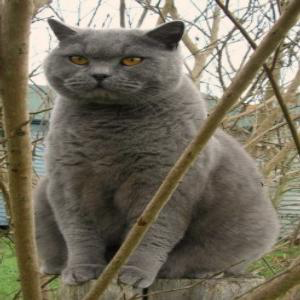
￼￼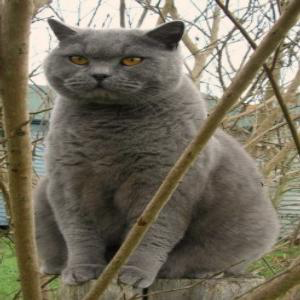
￼


￼
￼



In [ ]:
171)x
MATLAB files
Distance between points
SciPy defines some useful functions for computing distances between sets of points.
The function scipy.spatial.distance.pdist computes the distance between all pairs of points in a given set:
import numpy as np
from scipy.spatial.distance import pdist, squareform

# Create the following array where each row is a point in 2D space:
# [[0 1]
#  [1 0]
#  [2 0]]
x = np.array([[0, 1], [1, 0], [2, 0]])
print(x)

# Compute the Euclidean distance between all rows of x.
# d[i, j] is the Euclidean distance between x[i, :] and x[j, :],
# and d is the following array:
# [[ 0.          1.41421356  2.23606798]
#  [ 1.41421356  0.          1.        ]
#  [ 2.23606798  1.          0.        ]]
d = squareform(pdist(x, 'euclidean'))
print(d)



Matplotlib
import numpy as np
import matplotlib.pyplot as plt

# Compute the x and y coordinates for points on sine and cosine curves
x = np.arange(0, 3 * np.pi, 0.1)
y_sin = np.sin(x)
y_cos = np.cos(x)

# Plot the points using matplotlib
plt.plot(x, y_sin)
plt.plot(x, y_cos)
plt.xlabel('x axis label')
plt.ylabel('y axis label')
plt.title('Sine and Cosine')
plt.legend(['Sine', 'Cosine'])
plt.show()






Subplots
import numpy as np
import matplotlib.pyplot as plt

# Compute the x and y coordinates for points on sine and cosine curves
x = np.arange(0, 3 * np.pi, 0.1)
y_sin = np.sin(x)
y_cos = np.cos(x)

# Set up a subplot grid that has height 2 and width 1,
# and set the first such subplot as active.
plt.subplot(2, 1, 1)

# Make the first plot
plt.plot(x, y_sin)
plt.title('Sine')

# Set the second subplot as active, and make the second plot.
plt.subplot(2, 1, 2)
plt.plot(x, y_cos)
plt.title('Cosine')

# Show the figure.
plt.show()




Images
import numpy as np
from scipy.misc import imread, imresize
import matplotlib.pyplot as plt

img = imread('assets/cat.jpg')
img_tinted = img * [1, 0.95, 0.9]

# Show the original image
plt.subplot(1, 2, 1)
plt.imshow(img)

# Show the tinted image
plt.subplot(1, 2, 2)

# A slight gotcha with imshow is that it might give strange results
# if presented with data that is not uint8. To work around this, we
# explicitly cast the image to uint8 before displaying it.
plt.imshow(np.uint8(img_tinted))
plt.show()


￼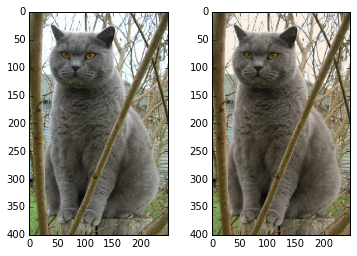

In [ ]:
# 172)x  Operator overloading

class Thing:
    def __init__(self, value):
        self.__value = value
    def __gt__(self, other):
        return self.__value > other.__value
    def __lt__(self, other):
        return self.__value < other.__value
    def __add__(self, other):
        return self.__value + other.__value


something = Thing(100)
nothing = Thing(0)
# True
print(something > nothing)
# False
print(something < nothing)
# Error
print(something + nothing)

In [ ]:
173)x
newspaper3k
If you haven’t seen it already, then be prepared to have your mind blown by Python’s newspaper module.

$ pip install newspaper3k


174)x
dictionary = {"a": 1, "b": 2}
def someFunction(a, b):
    print(a + b)
    return
# these do the same thing:
someFunction(**dictionary)
someFunction(a=1, b=2)

In [ ]:
# 174)x
# inspect
# Python’s inspect module is great for understanding what is happening behind the scenes. You can even call its methods on itself!
# The code sample below uses inspect.getsource() to print its own source code. It also uses inspect.getmodule() to print the module in which it was defined.


import inspect
print(inspect.getsource(inspect.getsource))
print(inspect.getmodule(inspect.getmodule))
print(inspect.currentframe().f_lineno)




In [ ]:
175)x
Jedi
The Jedi library is an autocompletion and code analysis library. It makes writing code quicker and more productive.
Unless you’re developing your own IDE, you’ll probably be most interested in using Jedi as an editor plugin. Luckily, there are already loads available!

https://medium.freecodecamp.org/an-a-z-of-useful-python-tricks-b467524ee747


In [ ]:
176)x
howdoi
Stuck on a coding problem and can’t remember that solution you saw before? Need to check StackOverflow, but don’t want to leave the terminal?
Then you need this useful command line tool.
$ pip install howdoi


In [ ]:
177)x
geopy
Geography can be a challenging terrain for programmers to navigate (ha, a pun!). But the geopy module makes it unnervingly easy.
$ pip install geopy


In [ ]:
178)x
collections
Python has some great default datatypes, but sometimes they just won’t behave exactly how you’d like them to.
Luckily, the Python Standard Library offers the collections module. This handy add-on provides you with further datatypes.
from collections import OrderedDict, Counter
# Remembers the order the keys are added!
x = OrderedDict(a=1, b=2, c=3)
# Counts the frequency of each character
y = Counter("Hello World!")

https://medium.freecodecamp.org/an-a-z-of-useful-python-tricks-b467524ee747



In [ ]:
# 179) Looping backwards
colors = ['red', 'green', 'blue', 'yellow']

for color in reversed(colors):
    print(color,end=' ', sep=',')

print()
# Forward sorted order
for color in sorted(colors):
    print(color, end=' ')

print()
# Backwards sorted order
for color in sorted(colors, reverse=True):
    print(color, end=' ')

In [ ]:
# 180)x
# Looping over a collection and indices

for i, color in enumerate(colors):
    print(i, '--->', color)


In [ ]:
# 181) Looping over two collections

names = ['raymond', 'rachel', 'matthew']
colors = ['red', 'green', 'blue', 'yellow']

n = min(len(names), len(colors))
for i in range(n):
    print(names[i], '--->', colors[i])

for name, color in zip(names, colors):
    print(name, '--->', color)

In [ ]:
# 182) Custom Sort Order

colors = ['red', 'green', 'blue', 'yellow']

def compare_length(c1, c2):
    if len(c1) < len(c2): return -1
    if len(c1) > len(c2): return 1
    return 0

print(sorted(colors, cmp=compare_length))

# Better
print(sorted(colors, key=len))


In [ ]:
183)x
Call a function until a sentinel value

blocks = []
while True:
    block = f.read(32)
    if block == '':
        break
    blocks.append(block)


Better
blocks = []
for block in iter(partial(f.read, 32), ''):
    blocks.append(block)

iter takes two arguments. The first you call over and over again and the second is a sentinel value.



In [ ]:
184)x
Distinguishing multiple exit points in loops

def find(seq, target):
    for i, value in enumerate(seq):
        if value == target:
            break
    else:
        return -1
    return i


Inside of every for loop is an else.

In [ ]:
185)x
Looping over dictionary keys

d = {'matthew': 'blue', 'rachel': 'green', 'raymond': 'red'}

for k in d:
    print k

for k in d.keys():
    if k.startswith('r'):
        del d[k]


d.keys() makes a copy of all the keys and stores them in a list. Then you can modify the dictionary. Note: in python 3 to iterate through a dictionary you have to explicitly write: list(d.keys()) because d.keys() returns a "dictionary view" (an iterable that provide a dynamic view on the dictionary’s keys).



Looping over dictionary keys and values
# Makes a big huge list
for k, v in d.items():
    print k, '--->', v


for k, v in d.iteritems():
    print k, '--->', v


In [ ]:
186)
Construct a dictionary from pairs

names = ['raymond', 'rachel', 'matthew']
colors = ['red', 'green', 'blue']

d = dict(zip(names, colors))
# {'matthew': 'blue', 'rachel': 'green', 'raymond': 'red'}


In [ ]:
# 187) Counting with dictionaries

colors = ['red', 'green', 'red', 'blue', 'green', 'red']

# Simple, basic way to count. A good start for beginners.
d = {}
for color in colors:
    if color not in d:
        d[color] = 0
    d[color] += 1

# {'blue': 1, 'green': 2, 'red': 3}


# Better
d = {}
for color in colors:
    d[color] = d.get(color, 0) + 1

# Slightly more modern but has several caveats, better for advanced users
# who understand the intricacies
d = collections.defaultdict(int)
for color in colors:
    d[color] += 1



In [ ]:
188) Grouping with dictionaries -- Part I and II

names = ['raymond', 'rachel', 'matthew', 'roger',
         'betty', 'melissa', 'judith', 'charlie']

# In this example, we're grouping by name length
d = {}
for name in names:
    key = len(name)
    if key not in d:
        d[key] = []
    d[key].append(name)

# {5: ['roger', 'betty'], 6: ['rachel', 'judith'], 7: ['raymond', 'matthew', 'melissa', 'charlie']}

d = {}
for name in names:
    key = len(name)
    d.setdefault(key, []).append(name)




d = collections.defaultdict(list)
for name in names:
    key = len(name)
    d[key].append(name)


In [ ]:
189. Is a dictionary popitem() atomic?


d = {'matthew': 'blue', 'rachel': 'green', 'raymond': 'red'}

while d:
    key, value = d.popitem()
    print key, '-->', value
popitem is atomic so you don't have to put locks around it to use it in threads.


In [ ]:
# 190) Linking dictionaries

defaults = {'color': 'red', 'user': 'guest'}
parser = argparse.ArgumentParser()
parser.add_argument('-u', '--user')
parser.add_argument('-c', '--color')
namespace = parser.parse_args([])
command_line_args = {k:v for k, v in vars(namespace).items() if v}

# The common approach below allows you to use defaults at first, then override them
# with environment variables and then finally override them with command line arguments.
# It copies data like crazy, unfortunately.
d = defaults.copy()
d.update(os.environ)
d.update(command_line_args)



In [ ]:
191)
Clarify function calls with keyword arguments

twitter_search('@obama', False, 20, True)

Better
twitter_search('@obama', retweets=False, numtweets=20, popular=True)


In [ ]:
Clarify multiple return values with named tuples

# Old testmod return value
doctest.testmod()
# (0, 4)
# Is this good or bad? You don't know because it's not clear.


Better
# New testmod return value, a namedTuple
doctest.testmod()
# TestResults(failed=0, attempted=4)
A namedTuple is a subclass of tuple so they still work like a regular tuple, but are more friendly.
To make a namedTuple:
TestResults = namedTuple('TestResults', ['failed', 'attempted'])




In [ ]:
192)x
https://docs.python.org/3/library/collections.html
import collections 
  
# Declaring namedtuple() 
Student = collections.namedtuple('Student',['name','age','DOB']) 
  
# Adding values 
S = Student('Nandini','19','2541997') 
  
# Access using index 
print ("The Student age using index is : ",end ="") 
print (S[1]) 
  
# Access using name  
print ("The Student name using keyname is : ",end ="") 
print (S.name) 
  
# Access using getattr() 
print ("The Student DOB using getattr() is : ",end ="") 
print (getattr(S,'DOB')) 


see also
https://data-flair.training/blogs/python-namedtuple/



In [ ]:
193)x
Updating multiple state variables

def fibonacci(n):
    x, y = 0, 1
    for i in range(n):
        print x
        x, y = y, x + y

In [ ]:
194)
Concatenating strings

names = ['raymond', 'rachel', 'matthew', 'roger',
         'betty', 'melissa', 'judith', 'charlie']

s = names[0]
for name in names[1:]:
    s += ', ' + name
print s

Better
print ', '.join(names)

In [ ]:
195)x
Updating sequences


names = ['raymond', 'rachel', 'matthew', 'roger',
         'betty', 'melissa', 'judith', 'charlie']

del names[0]
# The below are signs you're using the wrong data structure
names.pop(0)
names.insert(0, 'mark')

Better
names = collections.deque(['raymond', 'rachel', 'matthew', 'roger',
               'betty', 'melissa', 'judith', 'charlie'])

# More efficient with collections.deque
del names[0]
names.popleft()
names.appendleft('mark')



In [ ]:
196)x
Decorators and Context Managers
* Helps separate business logic from administrative logic
* Clean, beautiful tools for factoring code and improving code reuse
* Good naming is essential.
* Remember the Spiderman rule: With great power, comes great responsibility!

# Mixes business / administrative logic and is not reusable
def web_lookup(url, saved={}):
    if url in saved:
        return saved[url]
    page = urllib.urlopen(url).read()
    saved[url] = page
    return page



Better
@cache
def web_lookup(url):
    return urllib.urlopen(url).read()



In [ ]:
Factor-out temporary contexts

# Saving the old, restoring the new
old_context = getcontext().copy()
getcontext().prec = 50
print Decimal(355) / Decimal(113)
setcontext(old_context)


Better
with localcontext(Context(prec=50)):
    print Decimal(355) / Decimal(113)



In [ ]:
197)x
How to open and close files

f = open('data.txt')
try:
    data = f.read()
finally:
    f.close()


Better
with open('data.txt') as f:
    data = f.read()


In [ ]:
# Temporarily redirect standard out to a file and then return it to normal
with open('help.txt', 'w') as f:
    oldstdout = sys.stdout
    sys.stdout = f
    try:
        help(pow)
    finally:
        sys.stdout = oldstdout
Better
with open('help.txt', 'w') as f:
    with redirect_stdout(f):
        help(pow)


In [ ]:
198)x
List Comprehensions and Generator Expressions

result = []
for i in range(10):
    s = i ** 2
    result.append(s)
print(sum(result))



>>> c = time.time(); print(sum(i**2 for i in xrange(10))); d= time.time(); d-c
285
3.0994415283203125e-05
>>> c = time.time(); print(sum([i**2 for i in xrange(10)])); d= time.time(); d-c
285
3.1948089599609375e-05

In [ ]:
199)x
Find the most frequent number in a numpy vector

1.
a = np.array([1,2,3,1,2,1,1,1,3,2,2,1])
counts = np.bincount(a)
print np.argmax(counts)

2.
from collections import Counter
a = [1,2,3,1,2,1,1,1,3,2,2,1]
b = Counter(a)
print b.most_common(1)

3.
>>> from scipy.stats import mode
>>> mode([1,2,3,1,2,1,1,1,3,2,2,1])
(array([ 1.]), array([ 6.]))
>>> most_frequent = mode([1,2,3,1,2,1,1,1,3,2,2,1])[0][0]
>>> most_frequent
1.0


4.
lVals = [1,2,3,1,2,1,1,1,3,2,2,1]
print max(map(lambda val: (lVals.count(val), val), set(lVals)))


In [ ]:
200). kNN in Numpy

import numpy as np

class NearestNeighbor:
    def __init__(self):
        pass

    def train(self, X, y):
        self.Xtr = X  # N x D
        self.ytr = y  # N x 1





    def predict(self, X, k):
        num_test = X.shape[0]
        ypred = np.zeros(num_test, dtype= self.ytr.dtype)


        for i in xrange(num_test):
            distances = np.sum(np.abs(self.Xtr - X[i,:]), axis = 1 )
            idx = np.argsort(distances)
            print(idx[:k])
            idx = np.argmax(np.bincount(idx[:k]))
            ypred[i] = self.ytr[idx]
            # idx = np.argmin(distances)
            # ypred[i] = self.ytr[idx]


        return ypred



X = np.array([[1, 2, 3] , [10, 11, 10], [5, 7, 9], [51, 17, 19]])
Y = np.random.randint(1,3, 4)

myNN = NearestNeighbor()
myNN.train(X, Y)
print(Y)
print(myNN.predict(X, 4))


In [ ]:
201). 
importing from a different folder
from ctheory.CS231master.assignment3.cs231n.data_utils import load_CIFAR10

https://stackoverflow.com/questions/4383571/importing-files-from-different-folder



import sys
sys.path.insert(0, '/Users/borji/PycharmProjects/CS231n/ctheory/CS231master/assignment3/cs231n/')

from data_utils import load_CIFAR10




In [ ]:
202).
How to install wget in Mac OS X

https://mikebeach.org/2012/09/29/how-to-install-wget-in-mac-os-x/


In [ ]:
# Reshape the image data into rows
X_train = np.reshape(X_train, (X_train.shape[0], -1))         changes from (5000, 32*32*3 ) to (5000, 3072)
X_test = np.reshape(X_test, (X_test.shape[0], -1))
print X_train.shape, X_test.shape

(5000, 3072) (500, 3072)


In [ ]:

204)

https://github.com/cthorey/CS231/blob/master/assignment1/knn.ipynb


np.array([1,2,3])**2


number_test = X.shape[0]
number_train = self.X_train.shape[0]
dists = np.zeros((number_test, number_train))

def compute_distances_two_loops(self, X):
	for i in xrange(number_test):
		  for j in xrange(number_train):
			dists[i,j] = np.sum((X[i,:]-self.X_train[j,:])**2)
return dists


def compute_distances_one_loop(self, X):
for i in xrange(num_test):
  dists[i,:] = np.sum((self.X_train-X[i,:])**2,axis = 1)
return dists



def compute_distances_no_loops(self, X):
T = np.sum(X**2,axis = 1)
F = np.sum(self.X_train**2,axis = 1).T
F = np.tile(F,(500,5000))
FT = X.dot(self.X_train.T)
print T.shape,F.shape,FT.shape,X.shape,self.X_train.shape
dists = T+F-2*FT

https://stackoverflow.com/questions/2349991/how-to-import-other-python-files
    

In [ ]:
205)
num_correct = np.sum(y_test_pred == y_test)
accuracy = float(num_correct) / num_test
print 'Got %d / %d correct => accuracy: %f' % (num_correct, num_test, accuracy)


In [ ]:
206)


Practical issues: Numeric stability.


f = np.array([123, 456, 789]) # example with 3 classes and each having large scores
p = np.exp(f) / np.sum(np.exp(f)) # Bad: Numeric problem, potential blowup

# instead: first shift the values of f so that the highest number is 0:
f -= np.max(f) # f becomes [-666, -333, 0]
p = np.exp(f) / np.sum(np.exp(f)) # safe to do, gives the correct answer



**207) SVM vs. Softmax**
￼
￼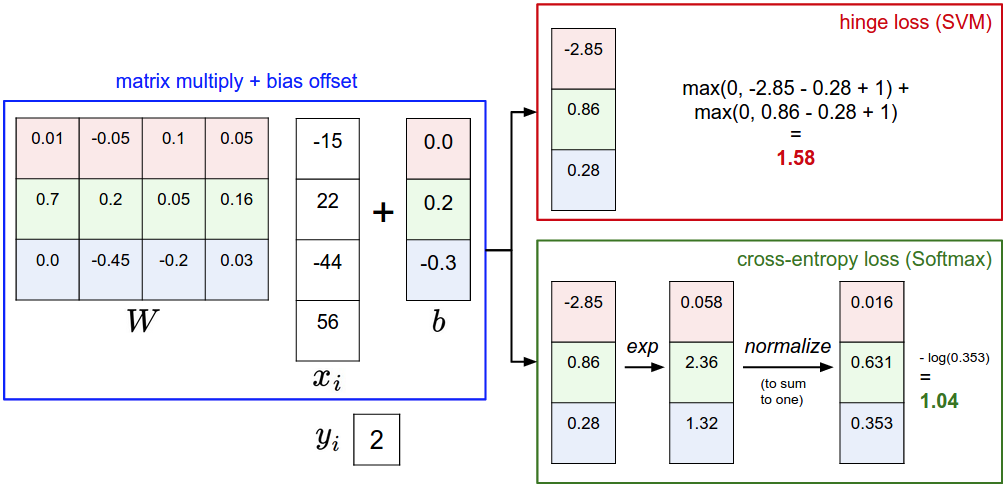




In [ ]:
208) 
softMax classifier on CIFAR
https://github.com/cthorey/CS231/blob/master/assignment1/softmax.ipynb


In [ ]:
CAPSULE Networks
https://github.com/Sarasra/models/tree/master/research/capsules
https://github.com/XifengGuo/CapsNet-Keras
https://github.com/www0wwwjs1/Matrix-Capsules-EM-Tensorflow



In [ ]:
209)
# Preprocessing: Subtract the mean feature
mean_feat = np.mean(X_train_feats, axis=1)
mean_feat = np.expand_dims(mean_feat, axis=1)
X_train_feats -= mean_feat
X_val_feats -= mean_feat
X_test_feats -= mean_feat

# Preprocessing: Divide by standard deviation. This ensures that each feature
# has roughly the same scale.
std_feat = np.std(X_train_feats, axis=1)
std_feat = np.expand_dims(std_feat, axis=1)
X_train_feats /= std_feat
X_val_feats /= std_feat
X_test_feats /= std_feat

# Preprocessing: Add a bias dimension
X_train_feats = np.vstack([X_train_feats, np.ones((1, X_train_feats.shape[1]))])
X_val_feats = np.vstack([X_val_feats, np.ones((1, X_val_feats.shape[1]))])
X_test_feats = np.vstack([X_test_feats, np.ones((1, X_test_feats.shape[1]))])




In [ ]:
210).   SOFTMax or xx
import numpy as np
from random import shuffle

def softmax_loss_naive(W, X, y, reg):
  """
  Softmax loss function, naive implementation (with loops)
  Inputs:
  - W: C x D array of weights
  - X: D x N array of data. Data are D-dimensional columns
  - y: 1-dimensional array of length N with labels 0...K-1, for K classes
  - reg: (float) regularization strength
  Returns:
  a tuple of:
  - loss as single float
  - gradient with respect to weights W, an array of same size as W
  """
  # Initialize the loss and gradient to zero.
  loss = 0.0
  dW = np.zeros_like(W)
  num_train = X.shape[1]
  num_class = dW.shape[0]
  #############################################################################
  # TODO: Compute the softmax loss and its gradient using explicit loops.     #
  # Store the loss in loss and the gradient in dW. If you are not careful     #
  # here, it is easy to run into numeric instability. Don't forget the        #
  # regularization!                                                           #
  #############################################################################

  loss = 0.0
  for i in xrange(num_train):
    X_i =  X[:,i]
    score_i = W.dot(X_i)
    stability = -score_i.max()
    exp_score_i = np.exp(score_i+stability)
    exp_score_total_i = np.sum(exp_score_i , axis = 0)
    for j in xrange(num_class):
      if j == y[i]:
        dW[j,:] += -X_i.T + (exp_score_i[j] / exp_score_total_i) * X_i.T
      else:
        dW[j,:] += (exp_score_i[j] / exp_score_total_i) * X_i.T
    numerator = np.exp(score_i[y[i]]+stability)
    denom = np.sum(np.exp(score_i+stability),axis = 0)
    loss += -np.log(numerator / float(denom))


  loss = loss / float(num_train) + 0.5 * reg * np.sum(W*W)
  dW = dW / float(num_train) + reg * W
  #############################################################################
  #                          END OF YOUR CODE                                 #
  #############################################################################
  
  return loss, dW


def softmax_loss_vectorized(W, X, y, reg):
  """
  Softmax loss function, vectorized version.

  Inputs and outputs are the same as softmax_loss_naive.
  """
  # Initialize the loss and gradient to zero.
  loss = 0.0
  dW = np.zeros_like(W)
  num_train = X.shape[1]
  num_class = W.shape[0]
  dW = np.zeros(W.shape) # initialize the gradient as zero 
  
  # #############################################################################
  # # TODO: Compute the softmax loss and its gradient using no explicit loops.  #
  # # Store the loss in loss and the gradient in dW. If you are not careful     #
  # # here, it is easy to run into numeric instability. Don't forget the        #
  # # regularization!                                                           #
  # #############################################################################
  
  score = W.dot(X)
  # On rajoute une constant pr ls overflow
  score += - np.max(score , axis=0)
  exp_score = np.exp(score) # matric exponientiel score
  sum_exp_score_col = np.sum(exp_score , axis = 0) # sum des expo score pr chaque column

  loss = np.log(sum_exp_score_col)
  loss = loss - score[y,np.arange(num_train)]
  loss = np.sum(loss) / float(num_train) + 0.5 * reg * np.sum(W*W)
  
  Grad = exp_score / sum_exp_score_col
  Grad[y,np.arange(num_train)] += -1.0
  dW = Grad.dot(X.T) / float(num_train) + reg*W
  
  #############################################################################
  #                          END OF YOUR CODE                                 #
  #############################################################################

  return loss, dW

In [ ]:
211) Gradient Check
import numpy as np
from random import randrange

def eval_numerical_gradient(f, x):
  """ 
  a naive implementation of numerical gradient of f at x 
  - f should be a function that takes a single argument
  - x is the point (numpy array) to evaluate the gradient at
  """ 

  fx = f(x) # evaluate function value at original point
  grad = np.zeros(x.shape)
  h = 0.00001

  # iterate over all indexes in x
  it = np.nditer(x, flags=['multi_index'], op_flags=['readwrite'])
  while not it.finished:

    # evaluate function at x+h
    ix = it.multi_index
    x[ix] += h # increment by h
    fxh = f(x) # evalute f(x + h)
    x[ix] -= h # restore to previous value (very important!)

    # compute the partial derivative
    grad[ix] = (fxh - fx) / h # the slope
    print ix, grad[ix]
    it.iternext() # step to next dimension

  return grad

def grad_check_sparse(f, x, analytic_grad, num_checks):
  """
  sample a few random elements and only return numerical
  in this dimensions.
  """
  h = 1e-5

  x.shape
  for i in xrange(num_checks):
    ix = tuple([randrange(m) for m in x.shape])
    print ix
    x[ix] += h # increment by h
    fxph = f(x) # evaluate f(x + h)
    x[ix] -= 2 * h # increment by h
    fxmh = f(x) # evaluate f(x - h)
    x[ix] += h # reset

    grad_numerical = (fxph - fxmh) / (2 * h)
    grad_analytic = analytic_grad[ix]
    rel_error = abs(grad_numerical - grad_analytic) / (abs(grad_numerical) + abs(grad_analytic))
    print 'numerical: %f analytic: %f, relative error: %e' % (grad_numerical, grad_analytic, rel_error)



In [ ]:
212)   http://localhost:8888/notebooks/assignment1/softmax.ipynb
from cs231n.classifiers import Softmax
results = {}
best_val = -1
best_softmax = None
learning_rates = [10**(-f) for f in np.arange(3,6,0.2)]
regularization_strengths = [10**(f) for f in np.arange(0.5,2,.2)]

################################################################################
# TODO:                                                                        #
# Use the validation set to set the learning rate and regularization strength. #
# This should be identical to the validation that you did for the SVM; save    #
# the best trained softmax classifer in best_softmax.                          #
################################################################################
for lr in learning_rates:
  for rs in regularization_strengths:
    softmax = Softmax()
    softmax.train(X_train,y_train, learning_rate = lr, reg =  rs,
                  num_iters = 100, batch_size = 200,verbose = False)
    acc_training = np.mean(softmax.predict(X_train) == y_train)
    acc_val = np.mean(softmax.predict(X_val) == y_val)
    print 'lr %e reg %e train accuracy: %f val accuracy: %f' % (
      lr, rs, acc_training, acc_val)
    results.update({(lr,rs):(acc_training,acc_val)})
    if acc_val> best_val:
      best_val = acc_val
      best_softmax = softmax
      best_params = (lr,rs)

# on retrain le model avec plus d'iteration
softmax = Softmax()
lr,rs = best_params      
softmax.train(X_train,y_train, learning_rate = lr, reg =  rs,
              num_iters = 1500, batch_size = 200,verbose = True)
best_val = np.mean(softmax.predict(X_val) == y_val)
best_softmax = softmax
################################################################################
#                              END OF YOUR CODE                                #
################################################################################
    
# Print out results.
for lr, reg in sorted(results):
    train_accuracy, val_accuracy = results[(lr, reg)]
    print 'lr %e reg %e train accuracy: %f val accuracy: %f' % (
                lr, reg, train_accuracy, val_accuracy)
    
print 'best validation accuracy achieved during cross-validation: %f' % best_val



In [ ]:
# 213) numpy Return the most frequent element of a numpy array 

u, indices = np.unique(closest_y, return_inverse=True) 
u[np.argmax(np.bincount(indices))] 

Return the indice of the max argument-Indices of the maximum values along an axis. 

argmax 

In case of multiple occurrences of the maximum values, the indices corresponding to the first occurrence are returned


In [ ]:
214)x
: Given an array A find pairs that some to K  [It is essentially the ice cream parlor problem]

def searchComp(arr, K):
    d = {arr[i]: j-1 for i, j in enumerate(arr)}

    # d = {}
    # for i in range(len(arr)):
    #     d[arr[i]] = i

    result = []

    for j in d.keys():
        # if d.get(K - j  , 'N') != 'N':
        # if d.has_key(K - j):  # works in python 2
        if (K - j)  in d:
            result.append((d[j], d[K-j]))
            # result.append((j, K-j))

            # result2.append((arr[i], arr[j]))

    return result


A = [1, 2, 3, 4]
K = 5


print(searchComp(A, K))


Similar to:
ICE CREAM PARLOR
https://www.youtube.com/watch?v=Ifwf3DBN1sc




In [ ]:
215)
Integral image in python



import numpy as np    <<Very NICE!!!!!>>

def integral_image(image):
    S = image
    for i in range(image.ndim):
        S = S.cumsum(axis=i)
    return S





def integralImage(arr):
    height = len(arr)
    width = len(arr[0])
    intImg = arr  # np.zeros((heigh, width))

    for i in range(1, height):
        intImg[i][0] += intImg[i-1][0]
    for j in range(1, width):
        intImg[0][j] += intImg[0][j-1]


    for i in range(1, height):
        for j in range(1, width):
            intImg[i][j] += intImg[i - 1][j] + intImg[i][j - 1] - intImg[i - 1][j - 1]
    return intImg


def calcArea(arr, Lx, Ly, Rx, Ry):
    intImg = integralImage(arr)
    print(intImg)
    return intImg[Rx][Ry] - intImg[Lx][Ry] - intImg[Rx][Ly] + intImg[Lx][Ly]




A = [[1, 2, 3],
     [4, 5, 6],
     [7, 8, 9]]


arr = np.ones((5, 6), dtype=np.float)
ii = integral_image(arr)
print(ii)

print(integralImage(arr))

# print(calcArea(A, 0, 0, 2, 2))

ii = integral_image(np.array(A))
print(ii)

print(integralImage(A))



In [ ]:
216) function to clear the screen

def cls():
	print(‘\n’ * 50)


cls()



In [ ]:
217)
Sort a list of tuples depending on two elements [duplicate]

python: how to sort a complex list on two different keys


CUSTOM SORT BASED ON TWO KEYS 

unsorted = [('a', 4, 2), ('a', 4, 3), ('a', 7, 2), ('a', 7, 3), ('b', 4, 2), ('b', 4, 3), ('b', 7, 2), ('b', 7, 3)]
sorted   = [('a', 4, 2), ('b', 4, 2), ('a', 4, 3), ('b', 4, 3), ('a', 7, 2), ('b', 7, 2), ('a', 7, 3), ('b', 7, 3)]
I



sorted(unsorted, key=lambda element: (element[1], element[2]))


l = [[name_d, 5], [name_e, 10], [name_a, 5]]
# copy
l_sorted = sorted(l, key=lambda x: (x[1] * -1, x[0]))
# in place
l.sort(key=lambda x: (x[1] * -1, x[0])




import operator

l = [[name_d, 5], [name_e, 10], [name_a, 5]]

l.sort(operator.itemgetter(1))
l.sort(operator.itemgetter(0), reverse=True)




In [ ]:

218. optional params

def add_numbers(x,y,z=None):
    if (z==None):
        return x+y
    else:
        return x+y+z

print(add_numbers(1, 2))
print(add_numbers(1, 2, 3))


def add_numbers(x, y, z=None, flag=False):
    if (flag):
        print('Flag is true!')
    if (z==None):
        return x + y
    else:
        return x + y + z
    
print(add_numbers(1, 2, flag=True))





In [ ]:
# 219)

def add_numbers(x,y):
    return x+y

a = add_numbers
a(1,2)



In [ ]:

220)
Use + to concatenate lists.
[1,2] + [3,4]

[1]*3


In [ ]:
221)
Python has a built in method for convenient string formatting.

sales_record = {
'price': 3.24,
'num_items': 4,
'person': 'Chris'}

sales_statement = '{} bought {} item(s) at a price of {} each for a total of {}'

print(sales_statement.format(sales_record['person'],
                             sales_record['num_items'],
                             sales_record['price'],
                             sales_record['num_items']*sales_record['price']))



In [ ]:
222)
Reading and Writing CSV files
import csv

%precision 2

with open('mpg.csv') as csvfile:
    mpg = list(csv.DictReader(csvfile))
    
mpg[:3] # The first three dictionaries in our list.



In [ ]:
223)
`csv.Dictreader` has read in each row of our csv file as a dictionary. `len` shows that our list is comprised of 234 dictionaries.




In [ ]:
224)
Here's an example of mapping the `min` function between two lists.
store1 = [10.00, 11.00, 12.34, 2.34]
store2 = [9.00, 11.10, 12.34, 2.01]
cheapest = map(min, store1, store2)
cheapest

for item in cheapest:
    print(item)


In [ ]:
225)
my_function = lambda a, b, c : a + b

my_function(1, 4, 3)


In [ ]:
226)
my_list = []
for number in range(0, 1000):
    if number % 2 == 0:
        my_list.append(number)
my_list



In [ ]:
227)
even numbers

my_list = [number for number in range(0,1000) if number % 2 == 0]
my_list


In [ ]:
228)
n = np.arange(0, 30, 2) # start at 0 count up by 2, stop before 30
n

n = n.reshape(3, 5) # reshape array to be 3x5
n

o = np.linspace(0, 4, 9) # return 9 evenly spaced values from 0 to 4
o

o.resize(3, 3)
o



np.ones((3, 2))
np.zeros((2, 3))
np.eye(3)
np.diag(y)

np.array([1, 2, 3] * 3)
np.repeat([1, 2, 3], 3)  —> array([1, 1, 1, 2, 2, 2, 3, 3, 3])
	

p = np.ones([2, 3], int)
np.vstack([p, 2*p])
np.hstack([p, 2*p])


print(x**2) # elementwise power  [1 2 3] ^2 =  [1 4 9]
x.dot(y) # dot product  1*4 + 2*5 + 3*6


z = np.array([y, y**2])
print(len(z)) # number of rows of array
z

z.dtype


Use .astype to cast to a specific type.
z = z.astype('f')
z.dtype



a = np.array([-4, -2, 1, 3, 5])
a.sum()
a.max()
a.min()
a.mean()
a.std()
a.argmax()
a.argmin()



Indexing / Slicing
s = np.arange(13)**2
s

s[0], s[4], s[-1]




r = np.arange(36)
r.resize((6, 6))
r


r[2, 2]
r[3, 3:6]
r[:2, :-1]
r[-1, ::2]
r[r > 30]
r[r > 30] = 30



Copying Data

Be careful with copying and modifying arrays in NumPy!

r2 = r[:3,:3]
r2

Set this slice's values to zero ([:] selects the entire array)

r2[:] = 0
r2

`r` has also been changed!

To avoid this, use `r.copy` to create a copy that will not affect the original array
r_copy = r.copy()
r_copy



Iterating Over Arrays

test = np.random.randint(0, 10, (4,3))
test

  —  Iterate by row:
for row in test:
    print(row)

  — Iterate by index:
for i in range(len(test)):
    print(test[i])


  — Iterate by row and index:
for i, row in enumerate(test):
    print('row', i, 'is', row)



Use `zip` to iterate over multiple iterables.
test2 = test**2
test2

for i, j in zip(test, test2):
    print(i,'+',j,'=',i+j)

[9 7 2] + [81 49  4] = [90 56  6]
[4 0 1] + [16  0  1] = [20  0  2]
[3 1 0] + [9 1 0] = [12  2  0]
[7 6 3] + [49 36  9] = [56 42 12]




In [ ]:
229)

dup_cols = {}

for i, c1 in enumerate(tqdm_notebook(train_enc.columns)):
    for c2 in train_enc.columns[i + 1:]:
        if c2 not in dup_cols and np.all(train_enc[c1] == train_enc[c2]):
            dup_cols[c2] = c1


In [ ]:


230.  [right align formatting]
for i in range(16): 
	print('{0:3} {1:16}'.format(i, 10**i))


In [ ]:
231)
for c in 'ABCDEF': print('[', c, ']', end='', sep='') print()

play with the separator and see what happens



In [ ]:

232)
timestable3.py

size = int(input("Please enter the table size: “))
for row in range(1, size + 1):
	for column in range(1, size + 1):
		product = row*column
		print('{0:4}'.format(product), end='')
	print()



In [ ]:
233

Bash cheat sheet
https://devhints.io/bash